# MultiLaneAnimation.ipynb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.path import Path
from IDMInterface import IDMSimulation

## Running the simulation and getting the data

In [7]:
cars = 50
length = 5000
lanes = 3
steps = 600*30
fn, df = IDMSimulation(road_length=length,
                      cars=cars,
                      lanes=3,
                      step_width=1/30,                
                      steps=steps,
                      EU=True)

t = df['t']
locations = np.zeros(shape=(steps, cars))
lane = np.zeros(shape=(steps, cars))

for car_index in range(0,cars):
    for step in range(0, steps):
        locations[step, car_index] = df['x' + str(car_index)][step]
        lane[step, car_index] = df['l' + str(car_index)][step]

microscopicIDM --road-length 5000 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 18000 --output-csv /tmp/IDM/5000_50_3_0.03333333333333333_18000_EU.csv --EU 


car.velocity = -23.9547 < 0
	car.location = 492.188
	car.accel = -1281.06
	car.front->location = 548.279
	car_in_front.location = 548.279
car.velocity = -4.38153 < 0
	car.location = 1133.21
	car.accel = -561.702
	car.front->location = 1139.57
	car_in_front.location = 1139.57
car.velocity = -9.17459 < 0
	car.location = 1171.8
	car.accel = -579.175
	car.front->location = 1177.83
	car_in_front.location = 1177.83
car.velocity = -9.20082 < 0
	car.location = 1224.06
	car.accel = -758.514
	car.front->location = 1232.42
	car_in_front.location = 1232.42
car.velocity = -16.8549 < 0
	car.location = 2086.86
	car.accel = -943.052
	car.front->location = 2092.86
	car_in_front.location = 2092.86
car.velocity = -2.34545 < 0
	car.location = 2125.36
	car.accel = -383.499
	car.front->location = 2131.56
	car_in_front.location = 2131.56
car.velocity = -0.676652 < 0
	car.location = 2780.71
	car.accel = -281.689
	car.front->location = 2787.25
	car_in_front.location = 2787.25
car.velocity = -1.28075 < 0
	car.l

## Defining the Car Icon
I was really bored

In [8]:
verts = [
    (-5,0), # lower left
    (-4.8,1.5), # top left
    (-2,1.5), # where the angle starts on the left
    (-1,3), # upper end of the back window
    (1,3), # upper end of the front window
    (2,1.5), # lower end of the front window
    (4.8,1.5),  # top right
    (5,0),  # lower right
    # tires
    (4,0), # start of front tire
    (3, -1), # lowest point of front tire
    (2,0), # end of front tire
    (-2,0), # start of back tire
    (-3, -1), # lowest point of back tire
    (-4,0), # end of back tire
]

codes = [
    Path.MOVETO, #begin the figure in the lower right
    Path.LINETO, #end curve in lower right
    Path.LINETO, #end curve in lower right
    Path.LINETO, #end curve in lower right
    Path.LINETO, #end curve in lower right
    Path.LINETO, #end curve in lower right
    Path.LINETO, #end curve in lower right
    Path.LINETO, #end curve in lower right
    # tires
    Path.LINETO, # line to the front of tire
    Path.CURVE3, # start a 3 point curve for the first tire
    Path.LINETO, # end fire tire
    Path.LINETO, # connection between the tires
    Path.CURVE3, # start a 3 point curve for the first tire
    Path.LINETO, # line to the front of tire
]

path = Path(verts,codes)

## Animation
Using the matplotlib animation part

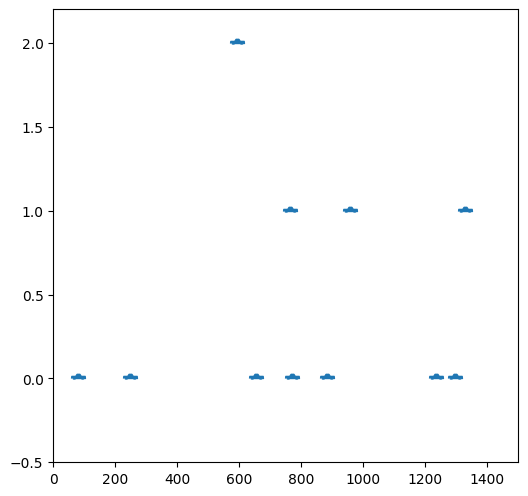

In [9]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, length))
ax.set_ylim((-0.5, 2.2))
scat = ax.scatter([], [], marker=path, s=100)

# initialization function: plot the background of each frame
def init():
    scat.set_offsets([0,0])
    return (scat,)

# animation function. This is called sequentially
def animate(i):
    x = locations[i,:]
    y = lane[i, :]
    plot_data = np.array([x,y])
    plot_data = np.transpose(plot_data)
    
    scat.set_offsets(plot_data)
    return (scat,)


# call the animator. blit=True means only re-draw the parts that have changed so that the animations display much more quickly.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=30, blit=True)


anim.save('multi_lane.mp4', writer = 'ffmpeg')